In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [2]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Populus_nigra/Pnigra_GM_Oulu_filtered_v2.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Populus_nigra/Pnigra_GM_Oulu_filtered_v2.h5', fields='*', overwrite=True)

In [3]:
callset_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Populus_nigra/Pnigra_GM_Oulu_filtered_v2.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Pnigra_GM_Oulu_filtered_v2.h5" (mode r)>

In [4]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [5]:
calldata = callset['calldata']

In [6]:
calldata

<HDF5 group "/calldata" (10 members)>

In [7]:
list(calldata)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'RGQ', 'SB']

In [8]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QD', 'AN', 'MQ', 'SOR', 'numalt', 'QUAL', 'MQRankSum', 'ReadPosRankSum'])
variants

<VariantChunkedTable shape=(324121,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QD', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('SOR', '<f4'), ('numalt', '<i4'), ('QUAL', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4')]
   nbytes=22.3M cbytes=7.4M cratio=3.0
   values=h5py._hl.group.Group>

In [9]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/wrk/Programs/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


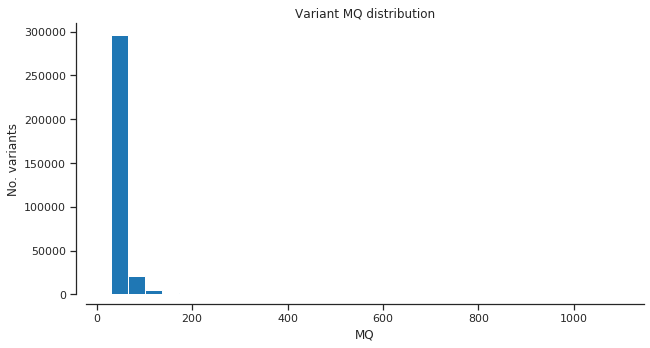

In [10]:
plot_variant_hist('MQ')

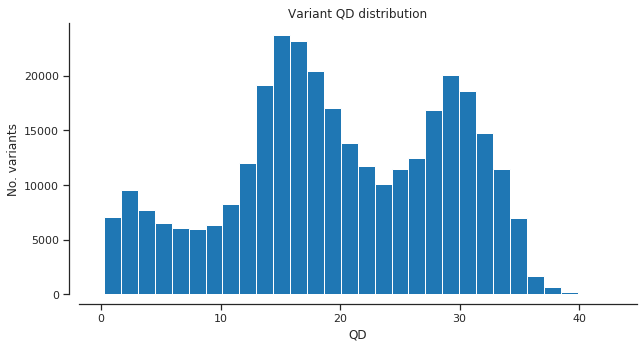

In [11]:
plot_variant_hist('QD')

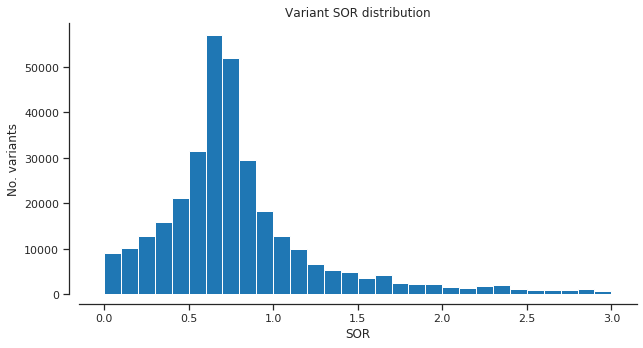

In [12]:
plot_variant_hist('SOR')

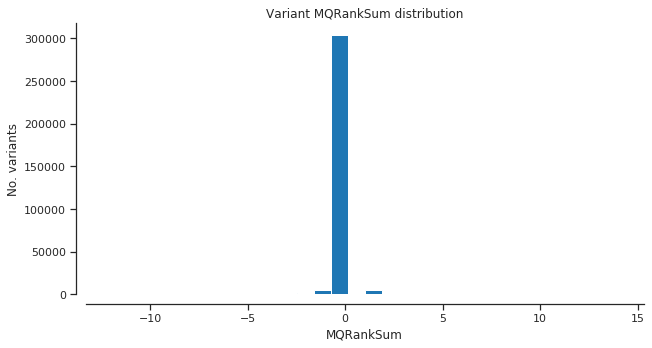

In [13]:
plot_variant_hist('MQRankSum')

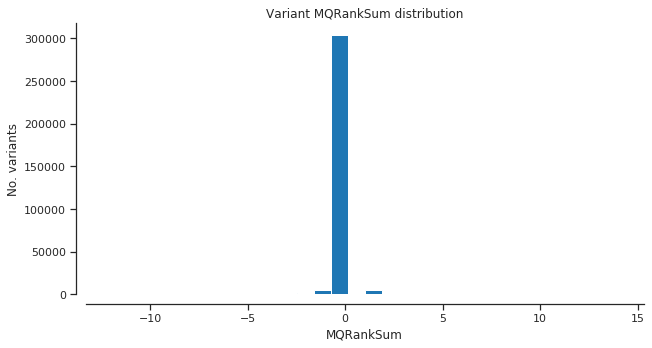

In [14]:
plot_variant_hist('MQRankSum')

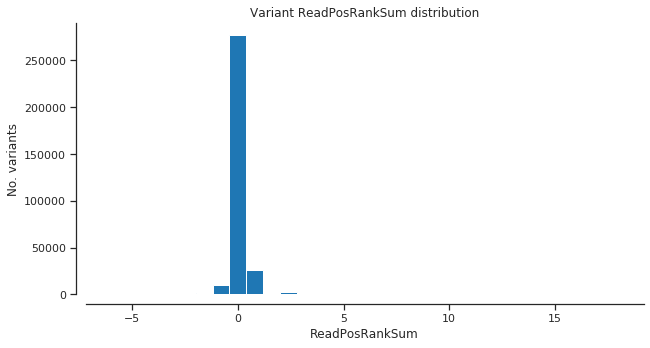

In [15]:
plot_variant_hist('ReadPosRankSum')

In [16]:
calldata = callset['calldata']
calldata

<HDF5 group "/calldata" (10 members)>

In [17]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(324121, 517, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=319.6M cbytes=27.3M cratio=11.7
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [18]:
samples = callset['samples']
samples = list(samples)
samples

['BH_PO_24_02',
 'BH_PO_24_04',
 'BH_PO_24_05',
 'BH_PO_24_07',
 'BH_PO_24_08',
 'BH_PO_24_09',
 'BH_PO_24_10',
 'BH_PO_24_11',
 'BH_PO_24_12',
 'BH_PO_24_15',
 'BH_PO_24_16',
 'BH_PO_24_17',
 'BH_PO_24_18',
 'BH_PO_24_19',
 'BH_PO_24_20',
 'BH_PO_24_21',
 'BH_PO_24_28',
 'BH_PO_24_30',
 'CH_PO_12_01',
 'CH_PO_12_02',
 'CH_PO_12_03',
 'CH_PO_12_04',
 'CH_PO_12_05',
 'CH_PO_12_06',
 'CH_PO_12_07',
 'CH_PO_12_08',
 'CH_PO_12_09',
 'CH_PO_12_10',
 'CH_PO_12_11',
 'CH_PO_12_12',
 'CH_PO_12_13',
 'CH_PO_12_14F',
 'CH_PO_12_14L',
 'CH_PO_12_15',
 'CH_PO_12_16F',
 'CH_PO_12_17',
 'CH_PO_12_18',
 'CH_PO_12_19',
 'CH_PO_12_20',
 'CH_PO_12_21',
 'CH_PO_12_22',
 'CH_PO_12_23',
 'CH_PO_12_24',
 'CH_PO_12_25',
 'CH_PO_12_26',
 'CH_PO_12_27',
 'CH_PO_12_28',
 'CH_PO_12_29',
 'CH_PO_12_30',
 'CH_PO_12_31',
 'CH_PO_12_32',
 'CH_PO_13_01',
 'CH_PO_13_02',
 'CH_PO_13_03',
 'CH_PO_13_04',
 'CH_PO_13_05',
 'CH_PO_13_06',
 'CH_PO_13_07',
 'CH_PO_13_08',
 'CH_PO_13_09',
 'CH_PO_13_10',
 'CH_PO_13_11',
 'CH_

In [19]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Populus_nigra/samples_Pnigra_GM_v2.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
512,MR_PO_23_55,MR_PO_23
513,MR_PO_23_57,MR_PO_23
514,MR_PO_23_59,MR_PO_23
515,MR_PO_23_62,MR_PO_23


In [20]:
samples.Population.value_counts()

GB_PO_19    36
CH_PO_12    33
FR_PO_7     30
FR_PO_4     28
FR_PO_6     28
FR_PO_5     28
FR_PO_21    27
CH_PO_13    27
FR_PO_20    25
DE_PO_11    25
MR_PO_23    25
DE_PO_9     24
IT_PO_16    24
DE_PO_10    24
DE_PO_8     24
ES_PO_2     22
IT_PO_17    20
BH_PO_24    18
IT_PO_14    16
FR_PO_22    15
IT_PO_15    13
ES_PO_1      5
Name: Population, dtype: int64

In [23]:
sample_selection = samples.Population.isin({'BH_PO_24', 'CH_PO_12', 'CH_PO_13', 'CT_PO_25', 'DE_PO_8',
       'DE_PO_9', 'DE_PO_10', 'DE_PO_11', 'ES_PO_1', 'ES_PO_2', 'FR_PO_4',
       'FR_PO_5', 'FR_PO_6', 'FR_PO_7', 'FR_PO_20', 'FR_PO_21',
       'FR_PO_22', 'GB_PO_19', 'GR_PO_18', 'IT_PO_14', 'IT_PO_15',
       'IT_PO_16', 'IT_PO_17', 'MR_PO_23'}).values
sample_selection[:5]

array([ True,  True,  True,  True,  True])

In [24]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(324121, 2) dtype=int32 chunks=(40516, 2)
   nbytes=2.5M cbytes=962.0K cratio=2.6
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

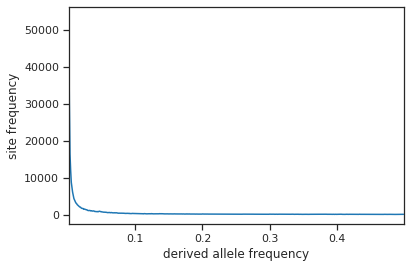

In [26]:
s = allel.sfs_folded(ac)
allel.plot_sfs(s, yscale="linear", n=ac.sum(axis=1).max())

In [27]:
n_variants = len(genotypes)
n_variants

324121

In [28]:
pc_missing = genotypes.count_missing(axis=0)[:] * 100 / n_variants
pc_het = genotypes.count_het(axis=0)[:] * 100 / n_variants

In [30]:
samples

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
512,MR_PO_23_55,MR_PO_23
513,MR_PO_23_57,MR_PO_23
514,MR_PO_23_59,MR_PO_23
515,MR_PO_23_62,MR_PO_23


In [31]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['BH_PO_24', 'CH_PO_12', 'CH_PO_13', 'DE_PO_8', 'DE_PO_9',
       'DE_PO_10', 'DE_PO_11', 'ES_PO_1', 'ES_PO_2', 'FR_PO_4', 'FR_PO_5',
       'FR_PO_6', 'FR_PO_7', 'FR_PO_20', 'FR_PO_21', 'FR_PO_22',
       'GB_PO_19', 'IT_PO_14', 'IT_PO_15', 'IT_PO_16', 'IT_PO_17',
       'MR_PO_23'], dtype=object)

In [32]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("bright", 28)
    pop2color = {'BH_PO_24': palette[0],
                 'CH_PO_12': palette[2],
                 'CH_PO_13': palette[3],
                 'DE_PO_8': palette[4],
                 'DE_PO_9': palette[5],
                 'DE_PO_10': palette[6],
                 'DE_PO_11': palette[8],
                 'ES_PO_1': palette[9],
                 'ES_PO_2': palette[10],
                 'FR_PO_4': palette[11],
                 'FR_PO_5': palette[12],
                 'FR_PO_6': palette[13],
                 'FR_PO_7': palette[14],
                 'FR_PO_20': palette[15],
                 'FR_PO_21': palette[16],
                 'FR_PO_22': palette[17],
                 'GB_PO_19': palette[18],
                 'IT_PO_14': palette[23],
                 'IT_PO_15': palette[24],
                 'IT_PO_16': palette[25],
                 'IT_PO_17': palette[26],
                 'MR_PO_23': palette[27]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[15]),
               mpl.patches.Patch(color=palette[16]),
               mpl.patches.Patch(color=palette[17]),
               mpl.patches.Patch(color=palette[18]),
               mpl.patches.Patch(color=palette[23]),
               mpl.patches.Patch(color=palette[24]),
               mpl.patches.Patch(color=palette[25]),
               mpl.patches.Patch(color=palette[26]),
               mpl.patches.Patch(color=palette[27])]
    ax.legend(handles=handles, labels=['BH_PO_24', 'CH_PO_12', 'CH_PO_13', 'DE_PO_8', 'DE_PO_9',
       'DE_PO_10', 'DE_PO_11', 'ES_PO_1', 'ES_PO_2', 'FR_PO_4', 'FR_PO_5',
       'FR_PO_6', 'FR_PO_7', 'FR_PO_20', 'FR_PO_21', 'FR_PO_22',
       'GB_PO_19', 'IT_PO_14', 'IT_PO_15', 'IT_PO_16', 'IT_PO_17',
       'MR_PO_23'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

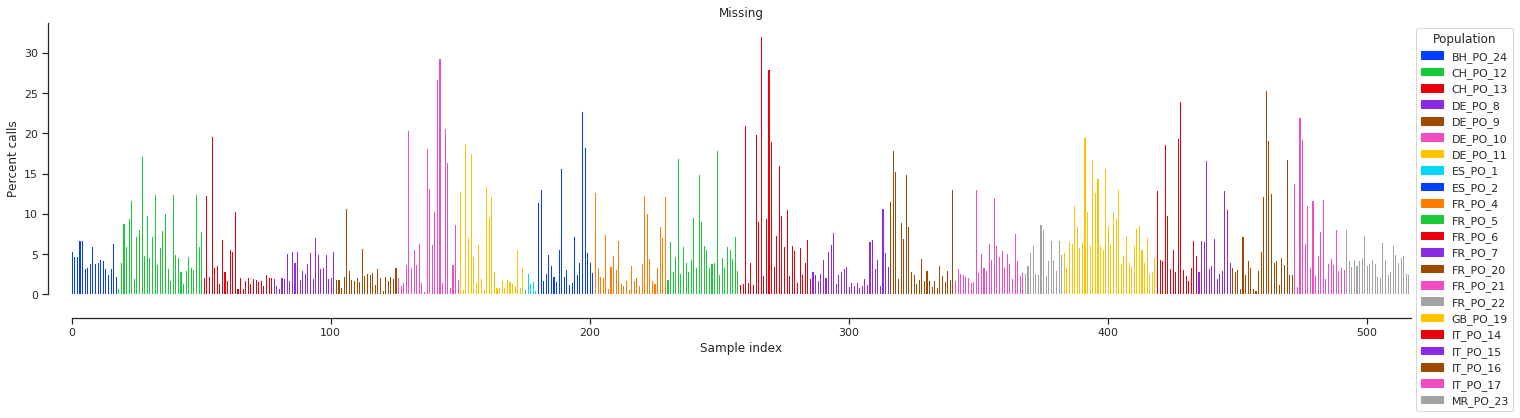

In [33]:
plot_genotype_frequency(pc_missing, 'Missing')

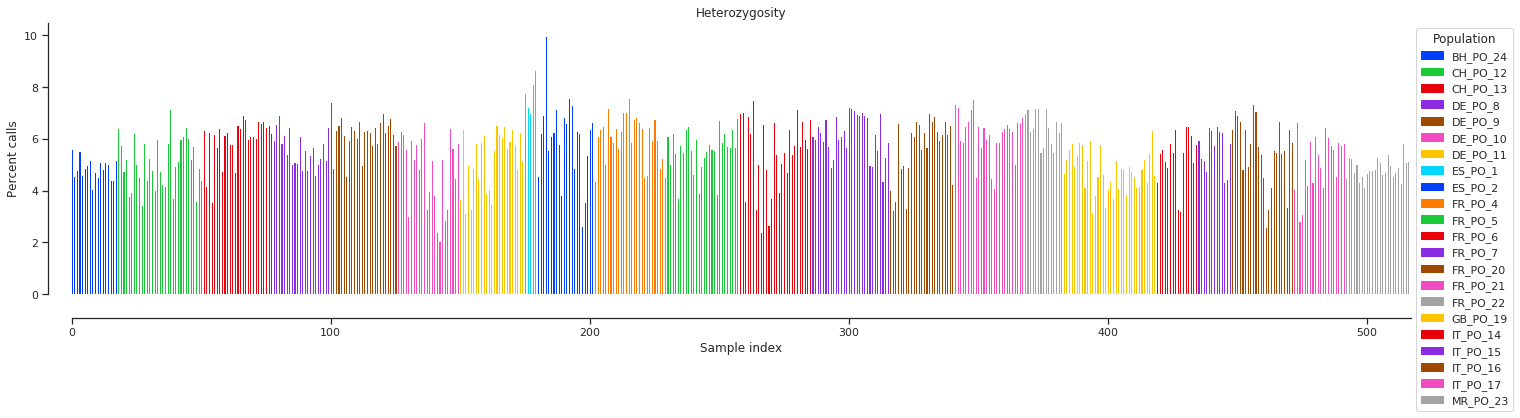

In [34]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

In [35]:
samples = samples_subset
samples

,ID,Population
0,BH_PO_24_02,BH_PO_24
1,BH_PO_24_04,BH_PO_24
2,BH_PO_24_05,BH_PO_24
3,BH_PO_24_07,BH_PO_24
4,BH_PO_24_08,BH_PO_24
...,...,...
512,MR_PO_23_55,MR_PO_23
513,MR_PO_23_57,MR_PO_23
514,MR_PO_23_59,MR_PO_23
515,MR_PO_23_62,MR_PO_23


In [36]:
populations = samples.Population.unique()

In [37]:
populations

array(['BH_PO_24', 'CH_PO_12', 'CH_PO_13', 'DE_PO_8', 'DE_PO_9',
       'DE_PO_10', 'DE_PO_11', 'ES_PO_1', 'ES_PO_2', 'FR_PO_4', 'FR_PO_5',
       'FR_PO_6', 'FR_PO_7', 'FR_PO_20', 'FR_PO_21', 'FR_PO_22',
       'GB_PO_19', 'IT_PO_14', 'IT_PO_15', 'IT_PO_16', 'IT_PO_17',
       'MR_PO_23'], dtype=object)

In [38]:
palette = sns.color_palette("hls",30)
pop_colours = {        
    'BH_PO_24': palette[0],
                 'CH_PO_12': palette[2],
                 'CH_PO_13': palette[3],
                 'DE_PO_8': palette[4],
                 'DE_PO_9': palette[5],
                 'DE_PO_10': palette[6],
                 'DE_PO_11': palette[8],
                 'ES_PO_1': palette[9],
                 'ES_PO_2': palette[10],
                 'FR_PO_4': palette[11],
                 'FR_PO_5': palette[12],
                 'FR_PO_6': palette[13],
                 'FR_PO_7': palette[14],
                 'FR_PO_20': palette[15],
                 'FR_PO_21': palette[16],
                 'FR_PO_22': palette[17],
                 'GB_PO_19': palette[18],
                 'IT_PO_14': palette[23],
                 'IT_PO_15': palette[24],
                 'IT_PO_16': palette[25],
                 'IT_PO_17': palette[26],
                 'MR_PO_23': palette[27]
                 
     }

In [43]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [44]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

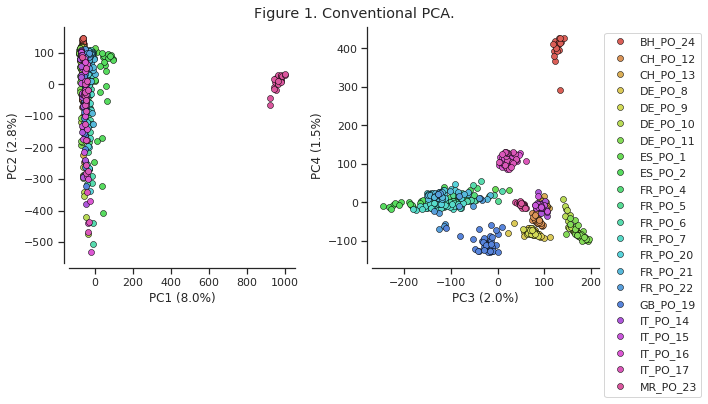

In [45]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')